Projeto de Ciências de Dados seguindo a metodolodia do CRISP-DM (CRoss-Industry Standard Process for Data Mining - Processo Padrão Inter-Indústrias para Mineração de Dados) para análise dos dados de rodas de Terapia Comunitária nos convênios com Ministério da Saúde nos anos de 2008, 2009 e 2011.

O CRISP-DM é uma metodologia de mineração de dados que surgiu em 1996 como uma proposta para padronizar os processos de mineração de dados das empresas, que teve no ano 2000 sua consolidação com a apresentação da versão 1.0, evidenciando um grande progressso na padronização dos processos de modelagem e extração de conhecimentos dos dados.

A metodologia consiste de 6 fases ciclicas que vão desde o entendido do negócio até o *deployment* do modelo de dados. Para o escopo do projeto não chegaremos à fase 6, que seria a disponibilização do modelo de dados em produção, por se tratar de um projeto acadêmico e não de necessidade de negócio ou mercado.

Assim, para o projeto será utilizado a metodologia seguindo da fase 1 a 5 conforme segue:

# Fase 1: Compreensão do Negócio

Nessa fase são definidos os objetivos do projeto, incluindo os critérios de sucesso que estejam relacionados à pelo menos um objetivo e tomando cuidado para que possam ser plausíveis e realistas.

## Objetivos

Criar modelo que possa avaliar a probabiliadde de ocorrência dos temas, baseado nos dados armazenados das rodas de Terapia Comunitária referentes às formações dos convênios de 2008, 2009 e 2011 (MS/UFC/FCPC/MISMEC-CE),  para ajudar na condução das terapias.

Objetivo Específico:

*   Verificar se o perfil do público (faixa etária) que participa da terapia afeta a ocorrência de determinados temas na terapia.

## Critérios de sucesso

O modelo deverá receber como entrada o perfil (faixa etária) dos participantes da Terapia Comunitária e avaliar quais os possíves temas terão mais probabilidade de serem apresentados durante a roda de terapia.

# Fase 2: Compreensão dos Dados

## Coleta dos dados inicias

O dataset utilizado tem origem de 3 planilhas eletrônicas (xls) que consolidam os dados das fichas de registro de rodas de Terapia Comunitária dos convênios:
* **2008**: Convênio: 2397/2008 Parceria: Ministério da Saúde / FCPC – Fundação
Cearense de Pesquisa e Cultura / MISMEC-CE – Movimento Integrado de Saúde
Mental Comunitária
* **2009**: Convênio: 3363/2009 Parceria: Ministério da Saúde / FCPC – Fundação
Cearense de Pesquisa e Cultura / MISMEC-CE – Movimento Integrado de Saúde
Mental Comunitária
* **2011**: Convênio “Capacitação em Terapia Comunitária Integrativa com ênfase em
contextos de calamidades públicas” (nº 26203/11-74 - TC 101 FNS / UFC). Parceria: Ministério da Saúde / UFC - Universidade Federal do Ceará / FCPC –
Fundação Cearense de Pesquisa e Cultura / MISMEC-CE – Movimento Integrado
de Saúde Mental Comunitária.

Esse coleta inicial já traz um primeiro filtro dos registros com possível duplicidade, ou seja, registros de uma mesma terapia que podem ter sido submetidos por terapeutas de uma mesma equipe.

In [1]:
# import das libs usadas no projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Baixando o dataset do GitHub
url= "https://github.com/rafaeld3castro/tcc2/raw/main/src/main/resources/dataset.xlsx"

# Lendo o datase e transformando em um dataframe do pandas
dados = pd.read_excel(url)

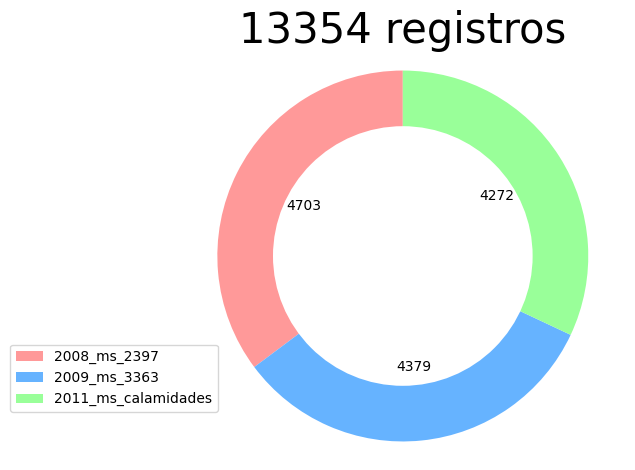

In [2]:
#Total de registros considerados no projeto
dados['convenio'] = dados['convenio'].replace('2013_ms_calamidades', '2011_ms_calamidades')
total_registros = dados['convenio'].count()

# Gráfico de Pizza da divisão dos dadso por convênio
labels_convenio = dados['convenio'].dropna().unique()
actual_values_convenio = dados['convenio'].value_counts(dropna=True)

# cores
colors = ['#ff9999','#66b3ff','#99ff99']

fig1, ax1 = plt.subplots()

# Valores atuais ao invés de porcentagem como labels no gráfico
values=dados['convenio'].value_counts(dropna=True)
title = str(total_registros) + ' registros'
plt.title(title, fontsize = 30)
plt.pie(actual_values_convenio, colors = colors, autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)


# draw circle (donut)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Proporção igual garante que a pizza seja desenhada como um círculo
ax1.axis('equal')

# Uma legenda separada com rótulos (desenhados na parte inferior esquerda da pizza neste caso)
plt.legend(labels_convenio, bbox_to_anchor = (0.1, .3))

plt.tight_layout()
plt.show()

Temos um total de **13354** registros, distribuidos da seguinte forma:

* **2008**: Convênio: 2397/2008 (4703 registros)
* **2009**: Convênio: 3363/2009 (4379 registros)
* **2011**: Convênio: 26203/11-74 - TC 101 FNS / UFC (4272 registros)

## Descrição dos Dados

* **Coluna 0 - convenio**: Convênio cuja formação dos terapeutas deu origem ao registro das rodas
* **Coluna 1 - UF**: Indica o UF no qual a terapia foi realizada
* **Coluna 2 - Data**: Inidica o data em que a terapia foi realizada
* **Coluna 3 - Horário**: Inidica o horário em que a terapia foi realizada

* **Coluna 4 - f_criancas**: Quantidade de crianças (até 12 anos) do público Feminino
* **Coluna 5 - f_adolescentes**: Quantidade de adolescentes (13 aos 20 anos) do público Feminino
* **Coluna 6 - f_adultos**: Quantidade de adultos (21 aos 59 anos) do público Feminino
* **Coluna 7 - f_idosos**: Quantidade de idosos (60 anos mais) do público Feminino
* **Coluna 8 - m_criancas**: Quantidade de crianças (até 12 anos) do público Masculino
* **Coluna 9 - m_adolescentes**: Quantidade de adolescentes (13 aos 20 anos) do público Masculino
* **Coluna 10 - m_adultos**: Quantidade de adultos (21 aos 59 anos) do público Masculino
* **Coluna 11 - m_idosos**: Quantidade de idosos (60 anos mais) do público Masculino

* **Coluna 12 - Estresse**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna 13 - Conflitos Familiares**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  14 - Violência**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  15 - Conflitos**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  16 - Problemas Escolares**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  17 - Drogas**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  18 - Alcoolismo**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  19 - Tabaco**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  20 - Depressão**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna 21 - Trabalho**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  22 - Abandono, Discriminação, Rejeição**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  23 - Problemas Mentais e Neurológicos**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  24 - Prostituição**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  25 - Outro**: 0 ou 1 pra indicar se o tema foi proposto ou não
* **Coluna  26 - Qual**: Se foi proposto outro tema, quais foram. Campo em texto aberto
* **Coluna 27 - Tema Escolhido**: Qual o tema foi escolhido na terapia

* **Coluna 28 - Fortalecimento / empoderamento pessoa**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 29 - Buscar ajuda religiosa ou espiritual**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 30 - Cuidar e se relacionar melhor com a família**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 31 - Buscar ajuda profissional e ações de cidadania**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 32 - Auto-cuidado - busca de recursos da cultura**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 33 - Participar de terapia comunitária**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 34 - Buscar redes solidárias**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 35 - Outras**: 0 ou 1 pra indicar se a estratégia foi apresentada ou não
* **Coluna 36 - Qual**: Se foi apresentada outra estratégia, quais foram. Campo em texto aberto
* **Coluna 37**: Depoimentos apresentados ao final da terapia


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 38 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   convenio                                                             13354 non-null  object
 1   UF                                                                   13344 non-null  object
 2   Data                                                                 13298 non-null  object
 3   Horário                                                              13278 non-null  object
 4   f_criancas                                                           13354 non-null  int64 
 5   f_adolescentes                                                       13354 non-null  int64 
 6   f_adultos                                                            13354 non-null  int64 
 7   f_idosos     

In [4]:
dados.describe()

,f_criancas,f_adolescentes,f_adultos,f_idosos,m_criancas,m_adolescentes,m_adultos,m_idosos,Estresse,Conflitos Familiares,...,"Abandono, Discriminação, Rejeição",Problemas Mentais e Neurológicos,Prostituição,Buscar ajuda religiosa ou espiritual,Cuidar e se relacionar melhor com a família,Buscar ajuda profissional e ações de cidadania (Serviços Públicos),Auto-cuidado - busca de recursos da cultura,Participar de terapia comunitária,Buscar redes solidárias,Outras
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,...,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,0.582822,0.923244,7.450577,2.142579,0.437322,0.647671,2.007414,0.598098,0.597724,0.471919,...,0.181219,0.048001,0.019021,0.503145,0.410364,0.291598,0.208402,0.379662,0.484199,0.039838
std,1.880917,2.774836,7.052126,4.083442,1.714167,2.464536,3.466568,1.673624,0.490375,0.499529,...,0.385214,0.213775,0.136602,0.500009,0.491918,0.454515,0.406181,0.485321,0.499769,0.195586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,44.000000,51.000000,216.000000,52.000000,45.000000,40.000000,56.000000,35.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Verificação da qualidade dos dados

Estratégia 'e_fort_empod' está com valores NaN, isso vai atrapalhar no somatório. Como o valor não está presente, será considerado como 0, ou seja, não teve ocorrência da estratégia de enfrentamento no registro.

In [5]:
dados['Fortalecimento / empoderamento pessoal'] = dados['Fortalecimento / empoderamento pessoal'].fillna(0)
dados['Fortalecimento / empoderamento pessoal'] = dados['Fortalecimento / empoderamento pessoal'].replace(r'^\s*$', 0, regex=True)

## Exploração os dados

In [6]:
dados.head()

,convenio,UF,Data,Horário,f_criancas,f_adolescentes,f_adultos,f_idosos,m_criancas,m_adolescentes,...,Fortalecimento / empoderamento pessoal,Buscar ajuda religiosa ou espiritual,Cuidar e se relacionar melhor com a família,Buscar ajuda profissional e ações de cidadania (Serviços Públicos),Auto-cuidado - busca de recursos da cultura,Participar de terapia comunitária,Buscar redes solidárias,Outras,Qual:.1,Unnamed: 37
0,2008_ms_2397,AM,18/11/2008,15:00:00,0,0,0,15,0,0,...,1,1,0,0,0,0,1,0,NaN,CALMA PACIÊNCIA PAZ FELICIDADE
1,2008_ms_2397,AM,2008-12-03 00:00:00,09:00:00,8,6,0,0,10,0,...,0,0,1,0,0,0,0,0,NaN,RESILIÊNCIA
2,2008_ms_2397,AM,2008-12-03 00:00:00,16:00:00,8,12,0,0,0,8,...,0,1,1,1,0,0,0,0,NaN,CONFIANÇA AMOR
3,2008_ms_2397,AM,2008-12-02 00:00:00,09:00:00,5,8,0,0,2,12,...,1,0,1,1,0,0,0,0,NaN,COMPREENSÃO PERDÃO COMPANHEIRISMO
4,2008_ms_2397,AM,2008-12-02 00:00:00,14:00:00,4,11,0,0,8,12,...,0,1,1,0,0,1,0,0,NaN,SAUDADE AMIZADE ENTENDER O OUTRO


### Público que participou das terapias

In [7]:
dados['criancas'] = dados["f_criancas"] + dados["m_criancas"]
dados['adolescentes'] = dados["f_adolescentes"] + dados["m_adolescentes"]
dados['adultos'] = dados["f_adultos"] + dados["m_adultos"]
dados['idosos'] = dados["f_idosos"] + dados["m_idosos"]

dados['total_pessoas'] = dados['adolescentes'] + dados['adultos'] + dados['idosos'] + dados['criancas']

total_criancas = dados['criancas'].sum()
total_adolescentes = dados['adolescentes'].sum()
total_adultos = dados['adultos'].sum()
total_idosos = dados['idosos'].sum()

print('Crianças: %d' % total_criancas)
print('Adolescentes: %d' % total_adolescentes)
print('Adultos: %d' % total_adultos)
print('Idosos: %d' % total_idosos)

Crianças: 13623
Adolescentes: 20978
Adultos: 126302
Idosos: 36599


In [8]:
dados['feminino'] = dados['f_adolescentes'] + dados['f_adultos'] + dados['f_idosos'] + dados['f_criancas']
dados['masculino'] = dados['m_adolescentes'] + dados['m_adultos'] + dados['m_idosos'] + dados['m_criancas']

total_feminino = dados['feminino'].sum()
total_masculino = dados['masculino'].sum()

print('Público Feminino: %d' % total_feminino)
print('Público Masculino: %d' % total_masculino)

Público Feminino: 148219
Público Masculino: 49283


In [9]:
dados.loc[:,['idosos','adolescentes','adultos','criancas','total_pessoas','feminino','masculino']].head(10)

,idosos,adolescentes,adultos,criancas,total_pessoas,feminino,masculino
0,25,0,0,0,25,15,10
1,0,6,0,18,24,14,10
2,0,20,0,8,28,20,8
3,0,20,0,7,27,13,14
4,0,23,0,12,35,15,20
5,0,19,0,8,27,14,13
6,0,22,0,6,28,16,12
7,0,16,0,9,25,19,6
8,0,10,0,13,23,12,11
9,0,28,0,20,48,24,24


In [10]:
dados.shape

(13354, 45)

<Axes: xlabel='adolescentes', ylabel='Count'>

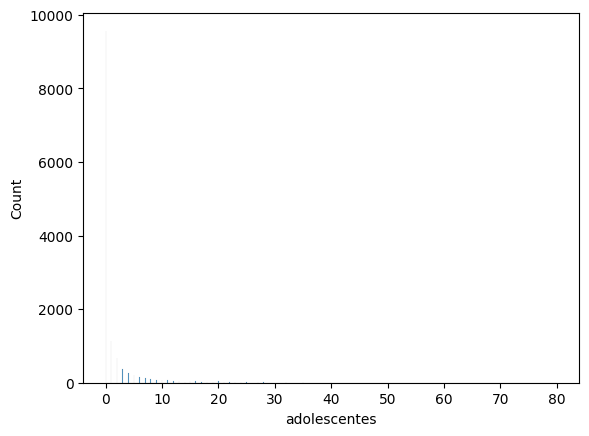

In [11]:
sns.histplot(dados, x='adolescentes')

<Axes: xlabel='adultos', ylabel='Count'>

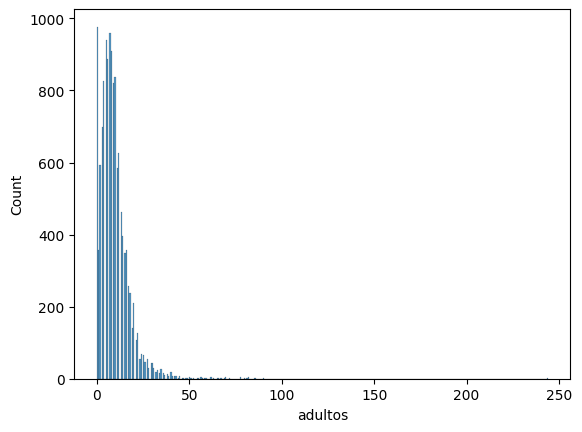

In [12]:
sns.histplot(dados, x='adultos')

<Axes: xlabel='criancas', ylabel='Count'>

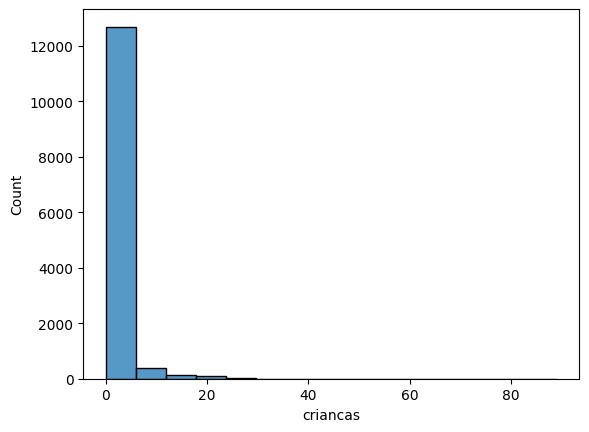

In [13]:
sns.histplot(dados, x='criancas')

<Axes: xlabel='idosos', ylabel='Count'>

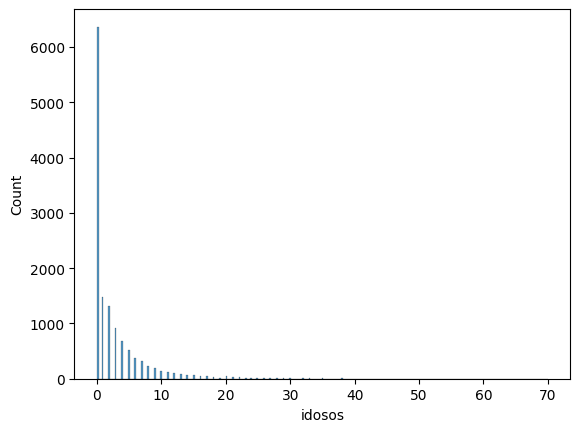

In [14]:
sns.histplot(dados, x='idosos')

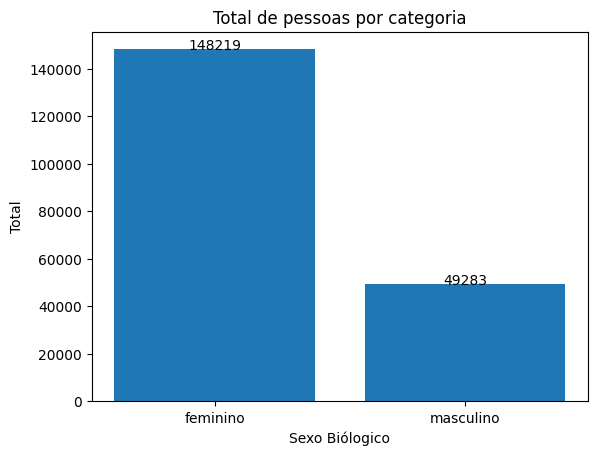

In [15]:
categorias = ['feminino', 'masculino']
totais = [total_feminino, total_masculino]

# Criar o gráfico de barras
plt.bar(categorias, totais)

# Adicionar os valores acima das barras
for i, v in enumerate(totais):
    plt.text(i, v+30, str(v), ha='center')

# Configurar o gráfico
# A época não a classição estava binária, e não incluía os grupos minoritários
plt.xlabel('Sexo Biólogico')
plt.ylabel('Total')
plt.title('Total de pessoas por categoria')

# Exibir o gráfico
plt.show()


Existe uma diferença considerável entre a quantidade de pessoas do público feminino comparado ao público masculino. Diferença essa de pouco mais de 3 vezes de um para o outro.

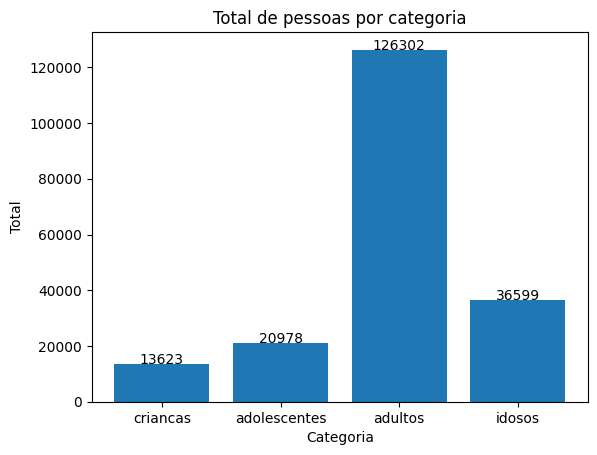

In [16]:
categorias = ['criancas', 'adolescentes','adultos','idosos']
totais =  [total_criancas, total_adolescentes,total_adultos,total_idosos]

# Criar o gráfico de barras
plt.bar(categorias, totais)

# Adicionar os valores acima das barras
for i, v in enumerate(totais):
    plt.text(i, v+30, str(v), ha='center')

# Configurar o gráfico
plt.xlabel('Categoria')
plt.ylabel('Total')
plt.title('Total de pessoas por categoria')

# Exibir o gráfico
plt.show()


Existe uma participação maior do público adulto nas terapias

###Temas propostos

Uma vez que os dados de tema proposto está 0 ou 1, para agrupar as ocorrências basta fazer o somatório de cada tema

In [17]:
# Agrupando os totais de cada tema proposto
total_estresse = dados['Estresse'].sum()
total_conflitos_fam = dados['Conflitos Familiares'].sum()
total_violencia = dados['Violência'].sum()
total_conflitos = dados['Conflitos'].sum()
total_problemas_esc = dados['Problemas Escolares'].sum()
total_drogas = dados['Drogas '].sum()
total_alcoolismo = dados['Alcoolismo'].sum()
total_tabaco = dados['Tabaco'].sum()
total_depressao = dados['Depressão'].sum()
total_trabalho = dados['Trabalho'].sum()
total_aband_disc_rej = dados['Abandono, Discriminação, Rejeição'].sum()
total_problemas_men = dados['Problemas Mentais e Neurológicos'].sum()
total_prostituicao = dados['Prostituição'].sum()

# Criando agrupando do total de todos os temas
totais_temas = [
    total_estresse, total_conflitos_fam, total_violencia, total_conflitos,
    total_problemas_esc, total_drogas, total_alcoolismo, total_tabaco,
    total_depressao, total_trabalho, total_aband_disc_rej,
    total_problemas_men, total_prostituicao
]

# Criando rótulo para cada tema
labels_temas = [
    'Estresse', 'Conflitos Familiares', 'Violência', 'Conflitos',
    'Problemas Escolares', 'Drogas', 'Alcoolismo', 'Tabaco',
    'Depressão', 'Trabalho', 'Abandono, Discriminação, Rejeição',
    'Problemas Mentais e Neurológicos', 'Prostituição'
]

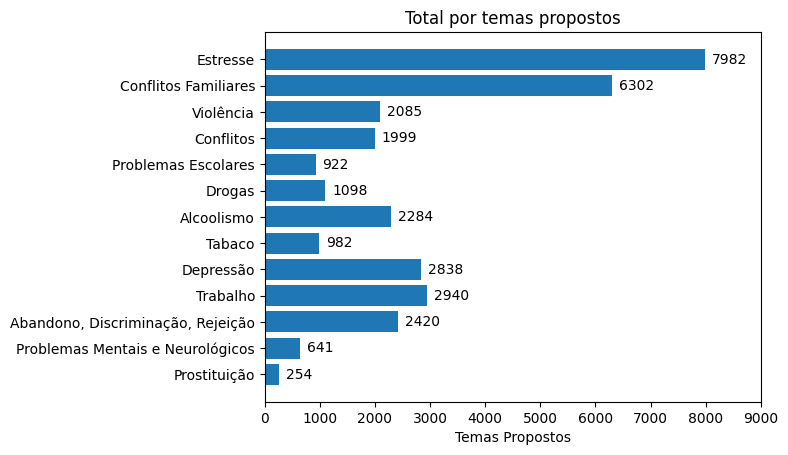

In [18]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Distribuição por tema proposto
y_pos = np.arange(len(labels_temas))
error = np.random.rand(len(labels_temas))

barra_temas = ax.barh(y_pos, totais_temas, xerr=error, align='center')
ax.bar_label(barra_temas, padding=5, color='black')

ax.set_yticks(y_pos, labels=labels_temas)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Temas Propostos')
ax.set_title('Total por temas propostos')
ax.set_xlim(0, 9000)

# Exibir o gráfico
plt.show()

###Estratégias de enfrentamento

Uma vez que os dados das estratégias de enfrentamento está 0 ou 1, para agrupar as ocorrências basta fazer o somatório de cada estratégia

In [19]:
# Agrupando os totais de cada estretégia proposta
total_fort_empod = dados['Fortalecimento / empoderamento pessoal'].sum()
total_ajuda_rel_esp = dados['Buscar ajuda religiosa ou espiritual '].sum()
total_cuid_rel_fam = dados['Cuidar e se relacionar melhor com a família '].sum()
total_busca_ajuda_pro = dados['Buscar ajuda profissional e ações de cidadania (Serviços Públicos) '].sum()
total_auto_cuidado = dados['Auto-cuidado - busca de recursos da cultura '].sum()
total_participar_tc = dados['Participar de terapia comunitária '].sum()
total_busca_redes_solid = dados['Buscar redes solidárias'].sum()

# Criando agrupamento do total de todas as estratégias propostas
totais_estrategias = [
    total_fort_empod,
    total_ajuda_rel_esp,
    total_cuid_rel_fam,
    total_busca_ajuda_pro,
    total_auto_cuidado,
    total_participar_tc,
    total_busca_redes_solid
]

# Criando rótulo para cada estratégias propostas
labels_estrategias = [
    'Fortalecimento / empoderamento pessoal',
    'Buscar ajuda religiosa ou espiritual',
    'Cuidar e se relacionar melhor com a família',
    'Buscar ajuda profissional e ações de cidadania',
    'Auto-cuidado - busca de recursos da cultura',
    'Participar de terapia comunitária',
    'Buscar redes solidárias'
]

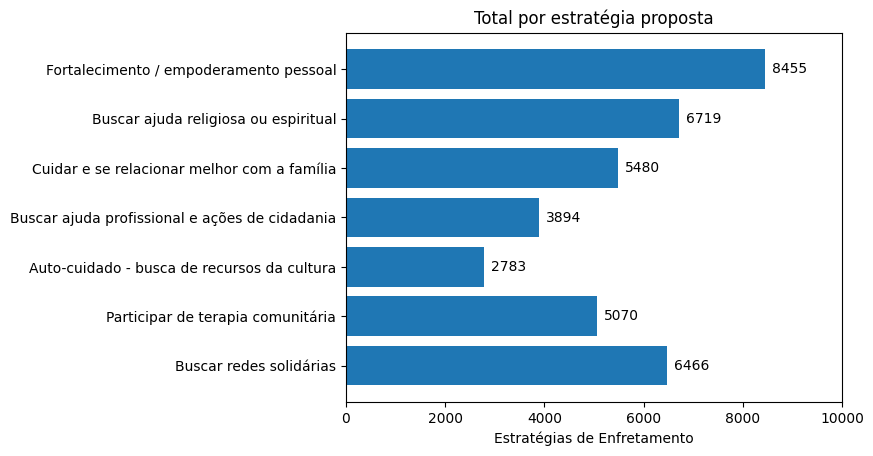

In [20]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Distribuição por estratégia proposta
y_pos = np.arange(len(labels_estrategias))
error = np.random.rand(len(labels_estrategias))

barra_estrategias = ax.barh(y_pos, totais_estrategias, xerr=error, align='center')
ax.bar_label(barra_estrategias, padding=5, color='black')

ax.set_yticks(y_pos, labels=labels_estrategias)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Estratégias de Enfretamento')
ax.set_title('Total por estratégia proposta')
ax.set_xlim(0, 10000)

# Exibir o gráfico
plt.show()

# Fase 3: Preparação dos Dados

## Seleção dos dados

O nome dos rótulos originais estão sendo simplificados para facilitar a visualização do conjunto de dados, bem como simplicar a seleção dos atribuitos, uma vez que os rótulos originais apresentam descrição que já foi aprensentada na fase anterior, não tendo a necessidade de mantê-los como estão, apresentando até caracteres desnessários. Assim a simplificação visa padronizar os rótulos para um tamanho mais uniforme. Segue abaixo a legenda para cada rótulo reescrito do conjunto de dados:

**Temas propostos (dado booleano - 0 ou 1):**

*   `t_estresse` = Estresse
*   `t_conflitos_fam` = Conflitos Familiares
*   `t_violencia` = Violência
*   `t_conflitos` = Conflitos
*   `t_problemas_esc` = Problemas Escolares
*   `t_drogas` = Drogas
*   `t_alcoolismo` = Alcoolismo
*   `t_tabaco` = Tabaco
*   `t_depressao` = Depressão
*   `t_trabalho` = Trabalho
*   `t_aband_disc_rej` = Abandono, Discriminação, Rejeição
*   `t_problemas_men` = Problemas Mentais e Neurológicos
*   `t_prostituicao` = Prostituição

**Estratégias de enfrentamento (dado booleano - 0 ou 1):**

*   `e_fort_empod` = Fortalecimento / empoderamento pessoal
*   `e_ajuda_rel_esp` = Buscar ajuda religiosa ou espiritual
*   `e_cuid_rel_fam` = Cuidar e se relacionar melhor com a família
*   `e_busca_ajuda_pro` = Buscar ajuda profissional e ações de cidadania (Serviços Públicos)
*   `e_auto_cuidado` = Auto-cuidado - busca de recursos da cultura
*   `e_participar_tc` = Participar de terapia comunitária
*   `e_busca_redes_solid` = Buscar redes solidárias



In [21]:
dados = dados.rename(columns={
    "convenio": "convenio",
    "UF": "uf",
    "Data": "data",
    "Horário": "hora",
    "Estresse": "t_estresse",
    "Conflitos Familiares": "t_conflitos_fam",
    "Violência": "t_violencia",
    "Conflitos": "t_conflitos",
    "Problemas Escolares": "t_problemas_esc",
    "Drogas ": "t_drogas",
    "Alcoolismo": "t_alcoolismo",
    "Tabaco": "t_tabaco",
    "Depressão": "t_depressao",
    "Trabalho": "t_trabalho",
    "Abandono, Discriminação, Rejeição": "t_aband_disc_rej",
    "Problemas Mentais e Neurológicos": "t_problemas_men",
    "Prostituição": "t_prostituicao",
    "Outro:": "t_outro",
    "Qual:": "t_outro_qual",
    "Tema Escolhido:": "t_escolhido",
    "Fortalecimento / empoderamento pessoal": "e_fort_empod",
    "Buscar ajuda religiosa ou espiritual ": "e_ajuda_rel_esp",
    "Cuidar e se relacionar melhor com a família ": "e_cuid_rel_fam",
    "Buscar ajuda profissional e ações de cidadania (Serviços Públicos) ": "e_busca_ajuda_pro",
    "Auto-cuidado - busca de recursos da cultura ": "e_auto_cuidado",
    "Participar de terapia comunitária ": "e_participar_tc",
    "Buscar redes solidárias": "e_busca_redes_solid",
    "Outras ": "e_outras",
    "Qual:.1": "e_outras_qual",
    "Unnamed: 37": "depoimentos"
})

Após a padronização dos rótulos, para otimizarmos o processamentos dos dados na fase seguinte, podemos resumir o conjunto de dados mantendo somente os atributos necessários para o treinamento e teste do modelo. Assim os atributos que permanecerão no dataset final serão os dados relacionados ao público, temas propostos e estratégias de enfrentamentaento sugeridos.

In [22]:
##Remover atributos do Dataframe
dados_final = dados.copy()
colunas_para_remover = [
    'uf', 'data', 'hora',
    't_outro', 't_outro_qual', 't_escolhido',
    'e_outras', 'e_outras_qual', 'depoimentos',
    ##'criancas', 'adolescentes', 'adultos', 'idosos', 'total_pessoas',
    'feminino', 'masculino'
]
dados_final.drop(columns=colunas_para_remover, inplace=True, axis=1)

##Limpeza dos dados

Na fase de Compreensão dos dados verificamos a qualidade dos dados e identificamos que havia um registro da estratégia de enfrentamento "*Fortalecimento / empoderamento pessoal*" que estava com valor faltante, e para poder realizar o somatório para visualização dos tatais fizemos um preenchimento com o valor 0. Assim para os valores faltantes para o atributo será mantida a estratégia de preencher o valor faltante com 0, indicando que a estratégias não foi sugerida na terapia que o registro representa.

In [23]:
dados_final['e_fort_empod'] = dados_final['e_fort_empod'].fillna(0)
dados_final['e_fort_empod'] = dados_final['e_fort_empod'].replace(r'^\s*$', 0, regex=True)

Identifiquei que alguns registros estavam com o público zerado, o que pode impactar no treinamento do modelo. Assim esses registros serão removidos do dataset final para não prejudicar a criação do modelo.

In [24]:
# Registros em que não teve público
publico_zerado = dados_final['total_pessoas'] == 0
total_registros_filtrados = publico_zerado.sum()

print("Total de registros com público zerado:", total_registros_filtrados)

Total de registros com público zerado: 93


In [25]:
# Removendo os registros em que não teve público
dados_final = dados_final.drop(dados_final[publico_zerado].index)

##Dataset Final

In [26]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13261 entries, 0 to 13353
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   convenio             13261 non-null  object
 1   f_criancas           13261 non-null  int64 
 2   f_adolescentes       13261 non-null  int64 
 3   f_adultos            13261 non-null  int64 
 4   f_idosos             13261 non-null  int64 
 5   m_criancas           13261 non-null  int64 
 6   m_adolescentes       13261 non-null  int64 
 7   m_adultos            13261 non-null  int64 
 8   m_idosos             13261 non-null  int64 
 9   t_estresse           13261 non-null  int64 
 10  t_conflitos_fam      13261 non-null  int64 
 11  t_violencia          13261 non-null  int64 
 12  t_conflitos          13261 non-null  int64 
 13  t_problemas_esc      13261 non-null  int64 
 14  t_drogas             13261 non-null  int64 
 15  t_alcoolismo         13261 non-null  int64 
 16  t_ta

# Fase 4: Modelagem

### Atributos de Entrada: Publico da terapia

In [27]:
publico_terapia = dados_final.loc[:, [
    "criancas", "adolescentes", "adultos", "idosos"
]]

### Atributos de Saída: Temas Propostos

In [28]:
# Crie um dicionário que associa os rótulos aos totais
temas_dicionario = dict(zip(labels_temas, totais_temas))

# Ordene os dados pelo valor em ordem decrescente
temas_ordenados = dict(sorted(temas_dicionario.items(), key=lambda item: item[1], reverse=True))

top_6_temas = list(temas_ordenados.keys())[:13]
top_6_temas_total = list(temas_ordenados.values())[:13]

visualizacao_frequencia_temas = pd.DataFrame(columns=['Tema', 'Total', 'Frequencia'])

total_registros_final = dados_final['convenio'].count()
for tema, total in zip(top_6_temas, top_6_temas_total):
    #print(f"{tema}, Total: {total}")
    #print("{} => Total: {} ({:.2%})".format(tema, total, (total / total_registros_final)))
    nova_visualizacao = pd.DataFrame([[tema, total, "{:.2%}".format(total / total_registros_final)]], columns=['Tema', 'Total', 'Frequencia'])
    visualizacao_frequencia_temas = pd.concat([visualizacao_frequencia_temas, nova_visualizacao], ignore_index=True)
    visualizacao_frequencia_temas.reset_index()

visualizacao_frequencia_temas.style.set_table_attributes("style='display:inline'").set_caption("Frequência dos temas nos registros").hide_index()

<ipython-input-28-d28a1faa09a1>:20: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  visualizacao_frequencia_temas.style.set_table_attributes("style='display:inline'").set_caption("Frequência dos temas nos registros").hide_index()


Tema,Total,Frequencia
Estresse,7982,60.19%
Conflitos Familiares,6302,47.52%
Trabalho,2940,22.17%
Depressão,2838,21.40%
"Abandono, Discriminação, Rejeição",2420,18.25%
Alcoolismo,2284,17.22%
Violência,2085,15.72%
Conflitos,1999,15.07%
Drogas,1098,8.28%
Tabaco,982,7.41%


In [29]:
tema_target = dados_final.loc[:, [
    "t_estresse", "t_conflitos_fam", "t_trabalho", "t_depressao", "t_aband_disc_rej", "t_alcoolismo",
    "t_violencia", "t_conflitos", "t_problemas_esc", "t_drogas", "t_tabaco", "t_problemas_men", "t_prostituicao"
]]

In [30]:
# Crie um dicionário que associa os rótulos aos totais
estrategias_dicionario = dict(zip(labels_estrategias, totais_estrategias))

# Ordene os dados pelo valor em ordem decrescente
estrategias_ordenados = dict(sorted(estrategias_dicionario.items(), key=lambda item: item[1], reverse=True))

top_estrategias = list(estrategias_ordenados.keys())
top_estrategias_total = list(estrategias_ordenados.values())

for estrategia, total in zip(top_estrategias, top_estrategias_total):
    print(f"{estrategia}, Total: {total}")

Fortalecimento / empoderamento pessoal, Total: 8455
Buscar ajuda religiosa ou espiritual, Total: 6719
Buscar redes solidárias, Total: 6466
Cuidar e se relacionar melhor com a família, Total: 5480
Participar de terapia comunitária, Total: 5070
Buscar ajuda profissional e ações de cidadania, Total: 3894
Auto-cuidado - busca de recursos da cultura, Total: 2783


In [31]:
estrategia_target = dados_final.loc[:, [
    "e_fort_empod", "e_ajuda_rel_esp", "e_cuid_rel_fam", "e_busca_ajuda_pro",
    "e_auto_cuidado", "e_participar_tc","e_busca_redes_solid"
]]

## Escolha dos classificadores

Aplicando o método de Validação Cruzada, usando K-Fold como validador, onde os dados de treinamento e teste serão escolhidos de acordo com a iteração do método, podemos ter uma pontuação baseada em diferentes configurações dos dados, onde os resultados das métricas adquiridas em cada confirguração será o score utilizado para escolher o modelo melhor rankeado.



### Estruturas de dados

In [32]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score, roc_auc_score, cohen_kappa_score

import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

from sklearn.exceptions import UndefinedMetricWarning

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

class Modelo:
  def __init__(self, nome, classificador):
    self.nome = nome
    self.classificador = classificador
    self.temas = []
    self.pontuacao = 0
    #self.colunas = ['Target', 'Accuracy', 'Precision', 'F1', 'Kappa', 'ROC AUC']
    self.colunas = ['Target', 'Accuracy', 'Precision', 'ROC AUC']
    self.visualizacao = pd.DataFrame(columns=self.colunas)

  def adicionar_score(self, target_nome, score):
    tema = Target(target_nome, score)
    self.temas.append(tema)

    nova_visualizacao = pd.DataFrame(
        [[tema.nome,
          "{:.2%} (std: {:.2f})".format(tema.accuracy, tema.accuracy_std),
          "{:.2%} (std: {:.2f})".format(tema.precision, tema.precision_std),
          #"{:.2%} (std: {:.2f})".format(tema.f1, tema.f1_std),
          #"{:.12f} (std: {:.2f})".format(tema.kappa, tema.kappa_std),
          "{:.12f} (std: {:.2f})".format(tema.roc, tema.roc_std)
        ]],
        columns=self.colunas
    )
    self.visualizacao = pd.concat([self.visualizacao, nova_visualizacao], ignore_index=True)
    self.visualizacao.reset_index()

  def mostrar_scores(self):
    display(self.visualizacao.style.set_table_attributes("style='display:inline'").set_caption(self.nome).hide_index())

  def pontuar(self):
    self.pontuacao = self.pontuacao + 1

  def resetar_pontuacao(self):
    self.pontuacao = 0


class Target:
  def __init__(self, nome, score):
    sorted(score.keys())

    self.nome = nome
    self.score = score
    self.accuracy = np.nanmean(score['test_accuracy'], axis=0)
    self.precision = np.nanmean(score['test_precision'], axis=0)
    self.f1 = np.nanmean(score['test_f1'], axis=0)
    self.kappa = np.nanmean(score['test_kappa'], axis=0)
    self.roc = np.nanmean(score['test_roc'], axis=0)

    self.accuracy_std = np.nanstd(score['test_accuracy'], axis=0)
    self.precision_std = np.nanstd(score['test_precision'], axis=0)
    self.f1_std = np.nanstd(score['test_f1'], axis=0)
    self.kappa_std = np.nanstd(score['test_kappa'], axis=0)
    self.roc_std = np.nanstd(score['test_roc'], axis=0)


class MetricaScore:

  def __init__(self, dados, clf, nome_clf, verbose=False):
    self.dados = dados
    self.kfold = KFold(n_splits=5, shuffle=False)
    self.clf = clf
    self.nome_clf = nome_clf
    self.modelos = []
    self.verbose = verbose

    self.temas = self.dados.loc[:, [
        "t_estresse", "t_conflitos_fam", "t_trabalho", "t_depressao", "t_aband_disc_rej", "t_alcoolismo",
        "t_violencia", "t_conflitos", "t_problemas_esc", "t_drogas", "t_tabaco", "t_problemas_men", "t_prostituicao"
    ]]

    self.temas_map = {
        'Estresse': 't_estresse',
        'Conflitos Familiares': 't_conflitos_fam',
        'Trabalho': 't_trabalho',
        'Depressão': 't_depressao',
        'Abandono, Discriminação, Rejeição': 't_aband_disc_rej',
        'Alcoolismo': 't_alcoolismo',
        'Violência': 't_violencia',
        'Conflitos': 't_conflitos',
        'Drogas': 't_drogas',
        'Tabaco': 't_tabaco',
        'Problemas Escolares': 't_problemas_esc',
        'Problemas Mentais e Neurológicos': 't_problemas_men',
        'Prostituição': 't_prostituicao'
    }

    self.average = 'weighted'
    self.scoring = {
        'accuracy': make_scorer(accuracy_score, normalize=True),
        'precision': make_scorer(precision_score, average=self.average),
        'f1': make_scorer(f1_score, average=self.average),
        'kappa': make_scorer(cohen_kappa_score),
        'roc': make_scorer(roc_auc_score, average=self.average, multi_class='ovr')
    }

  def __calcular_scores__(self, atributos):
    modelo = Modelo(self.nome_clf, self.clf)
    for tema_nome, tema_coluna in self.temas_map.items():
      x = atributos
      y = self.temas[tema_coluna]
      modelo.adicionar_score(tema_nome, cross_validate(self.clf, x, y, cv=self.kfold, scoring=self.scoring, return_estimator=True))

    self.modelos.append(modelo)

  def calcular_scores(self):
    self.__calcular_scores__(self.dados.loc[:, ["criancas", "adolescentes", "adultos", "idosos"]])

  def mostrar_scores(self):
    for modelo in self.modelos:
      modelo.mostrar_scores()

  def modelo(self):
    return self.modelos[0]

In [33]:
def comparar_metricas(metrica_scores, index, resumir=False):

  tema = metrica_scores[0].modelo().temas[index].nome

  if resumir:
    metrics = ("Accuracy", "Precision", "ROC AUC")
  else:
    metrics = ("Accuracy", "Precision", "F1", "Kappa", "ROC AUC")

  scores = {}

  for score in metrica_scores:
    modelo = score.modelo()
    target = modelo.temas[index]
    accuracy = target.accuracy
    precision = target.precision
    f1 = target.f1
    kappa = target.kappa
    roc = target.roc
    if resumir:
      scores[modelo.nome] = (accuracy, precision, roc)
    else:
      scores[modelo.nome] = (accuracy, precision, f1, kappa, roc)

  x = np.arange(len(metrics))  # the label locations
  width = 0.30  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
  fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

  plt.rcdefaults()
  sns.set_theme()
  sns.set_context("paper")

  for atributo, valores in scores.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, valores, width, label=atributo)

      dentro_barra = ["{:.3f}".format(p) if p > 0.4 else '' for p in valores]
      acima_barra = ["{:.3f}".format(p) if p <= 0.4 else '' for p in valores]

      ax.bar_label(rects, dentro_barra, padding=-15, color='white', fontweight='bold')
      ax.bar_label(rects, acima_barra, padding=5, color='black', fontweight='bold')

      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  #ax.set_ylabel('Length (mm)')
  ax.set_title("Tema: {}".format(tema))
  ax.set_xticks(x + width, metrics)

  #ax.legend(loc='upper left', ncols=3)

  # Put a legend below current axis
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

  ax.set_ylim(-0.1, 1)

  plt.show()

### Cross Validation para K-Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#knn = MetricaScore(dados_final, KNeighborsClassifier(n_neighbors=5), "K-Neighbors Classifier")
#knn.calcular_scores()

### Cross Validation para Multi-layer Perceptron

In [35]:
from sklearn.neural_network import MLPClassifier

#mpl = MetricaScore(dados_final, MLPClassifier(hidden_layer_sizes=(15,), random_state=1, verbose=False), 'Multi-layer Perceptron Classifier')
#mpl.calcular_scores()

### Cross Validation - Ensemble Classifiers

In [36]:
# Gradient-boosted trees
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = MetricaScore(dados_final, GradientBoostingClassifier(n_estimators=10, learning_rate=1.0), 'Gradient-boosted trees Classifier')
gradient_boosting.calcular_scores()

In [37]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

random_forests = MetricaScore(dados_final, RandomForestClassifier(n_estimators=10), 'Random Forest Classifier')
random_forests.calcular_scores()

In [38]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_boost = MetricaScore(dados_final, AdaBoostClassifier(n_estimators=10, learning_rate=1.0), 'Ada Boost Classifier')
ada_boost.calcular_scores()

##Visualização dos Resultados

### Tabulados

In [39]:
gradient_boosting.mostrar_scores()

Target,Accuracy,Precision,ROC AUC
Estresse,59.56% (std: 0.09),60.05% (std: 0.03),0.525277543196 (std: 0.01)
Conflitos Familiares,51.73% (std: 0.02),52.21% (std: 0.01),0.514297225719 (std: 0.01)
Trabalho,77.62% (std: 0.03),65.15% (std: 0.03),0.499857659686 (std: 0.00)
Depressão,78.31% (std: 0.09),69.49% (std: 0.12),0.502146504162 (std: 0.00)
"Abandono, Discriminação, Rejeição",81.52% (std: 0.08),72.38% (std: 0.09),0.499969016167 (std: 0.00)
Alcoolismo,82.61% (std: 0.02),71.89% (std: 0.04),0.499996698083 (std: 0.00)
Violência,84.04% (std: 0.06),76.75% (std: 0.08),0.502202666232 (std: 0.00)
Conflitos,84.75% (std: 0.04),74.94% (std: 0.07),0.499422633463 (std: 0.00)
Drogas,91.58% (std: 0.01),84.75% (std: 0.02),0.499631169970 (std: 0.00)
Tabaco,92.48% (std: 0.08),88.37% (std: 0.13),0.499707046558 (std: 0.00)


In [40]:
random_forests.mostrar_scores()

Target,Accuracy,Precision,ROC AUC
Estresse,55.89% (std: 0.06),55.97% (std: 0.03),0.517587889016 (std: 0.01)
Conflitos Familiares,50.50% (std: 0.01),50.69% (std: 0.01),0.504658613309 (std: 0.00)
Trabalho,74.72% (std: 0.03),65.68% (std: 0.04),0.499963301347 (std: 0.01)
Depressão,75.15% (std: 0.08),69.59% (std: 0.12),0.513110362290 (std: 0.01)
"Abandono, Discriminação, Rejeição",78.31% (std: 0.07),71.26% (std: 0.10),0.498474691349 (std: 0.01)
Alcoolismo,80.02% (std: 0.02),71.87% (std: 0.03),0.501124944262 (std: 0.00)
Violência,81.62% (std: 0.05),74.31% (std: 0.07),0.500363250592 (std: 0.00)
Conflitos,82.88% (std: 0.04),74.55% (std: 0.07),0.501153920513 (std: 0.01)
Drogas,90.84% (std: 0.01),85.57% (std: 0.01),0.503146326284 (std: 0.01)
Tabaco,91.74% (std: 0.08),88.64% (std: 0.12),0.499624234108 (std: 0.01)


In [41]:
ada_boost.mostrar_scores()

Target,Accuracy,Precision,ROC AUC
Estresse,59.93% (std: 0.09),60.19% (std: 0.03),0.523205173305 (std: 0.01)
Conflitos Familiares,52.67% (std: 0.03),52.34% (std: 0.02),0.503433792132 (std: 0.00)
Trabalho,77.97% (std: 0.03),60.89% (std: 0.04),0.499950124688 (std: 0.00)
Depressão,78.69% (std: 0.09),62.79% (std: 0.15),0.500000000000 (std: 0.00)
"Abandono, Discriminação, Rejeição",81.82% (std: 0.08),68.40% (std: 0.12),0.499661042037 (std: 0.00)
Alcoolismo,82.87% (std: 0.02),68.71% (std: 0.03),0.500000000000 (std: 0.00)
Violência,84.36% (std: 0.06),71.49% (std: 0.09),0.500000000000 (std: 0.00)
Conflitos,85.02% (std: 0.04),72.50% (std: 0.08),0.499955908289 (std: 0.00)
Drogas,91.83% (std: 0.01),84.35% (std: 0.02),0.500000000000 (std: 0.00)
Tabaco,92.62% (std: 0.08),86.49% (std: 0.15),0.500000000000 (std: 0.00)


### Gráficos comparativos por tema

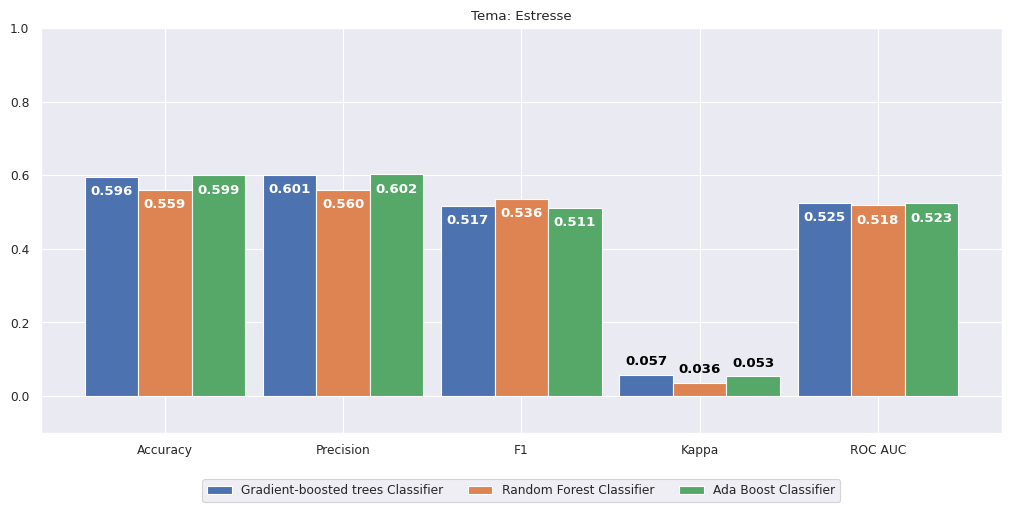

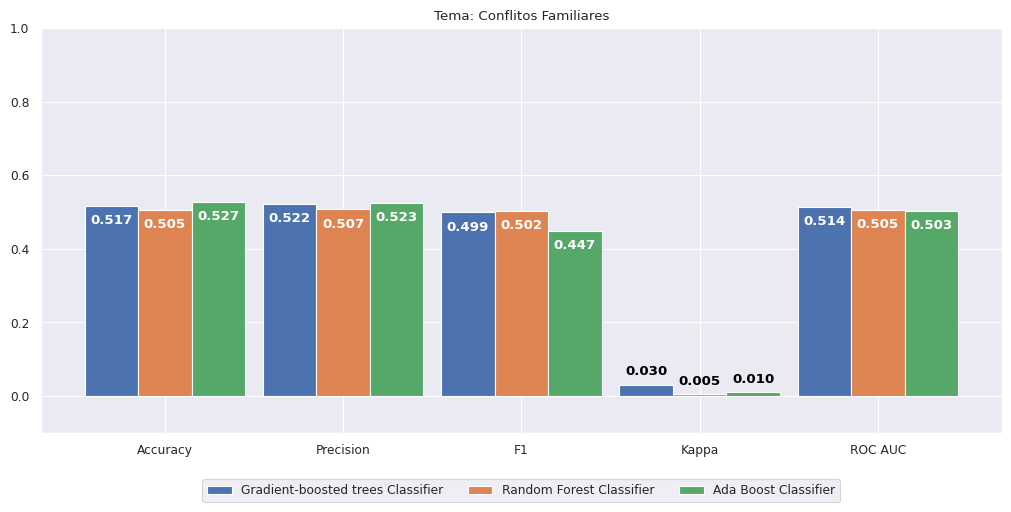

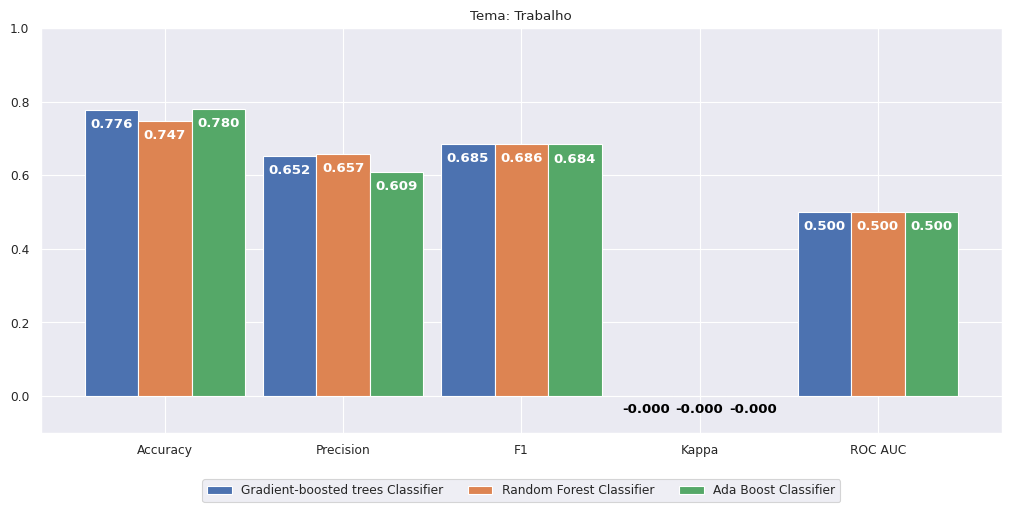

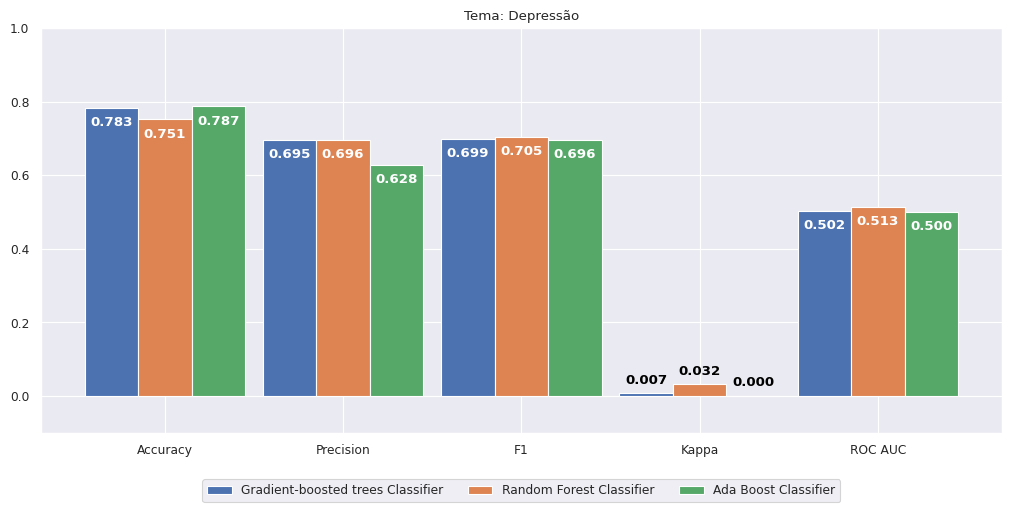

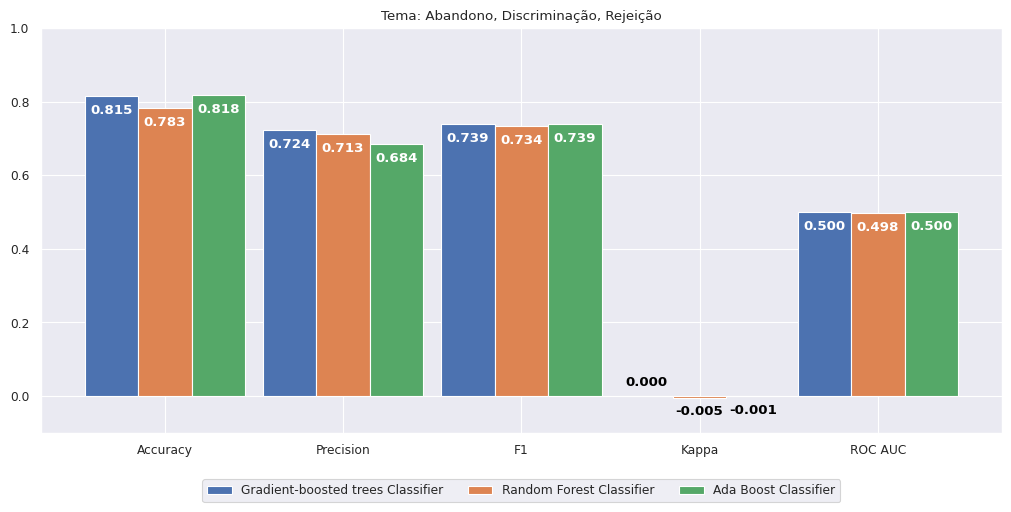

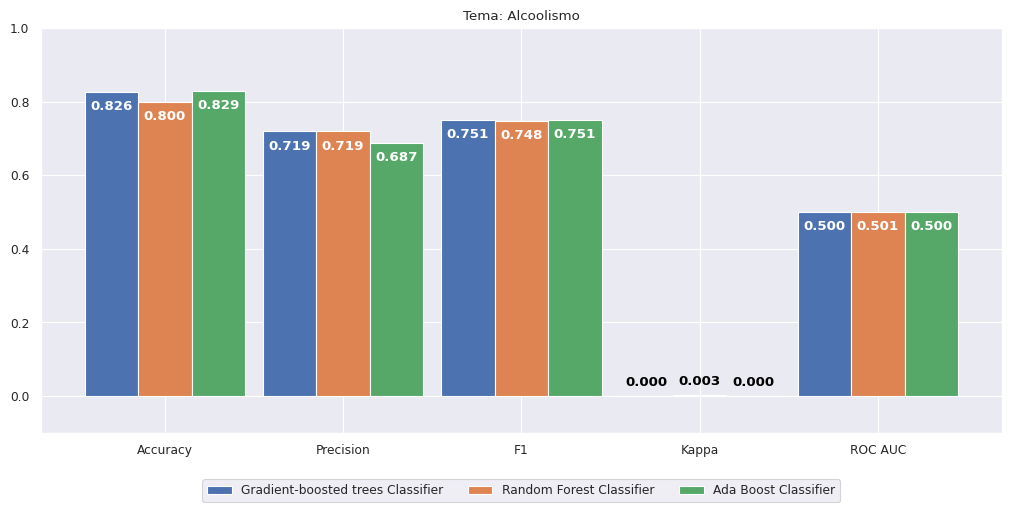

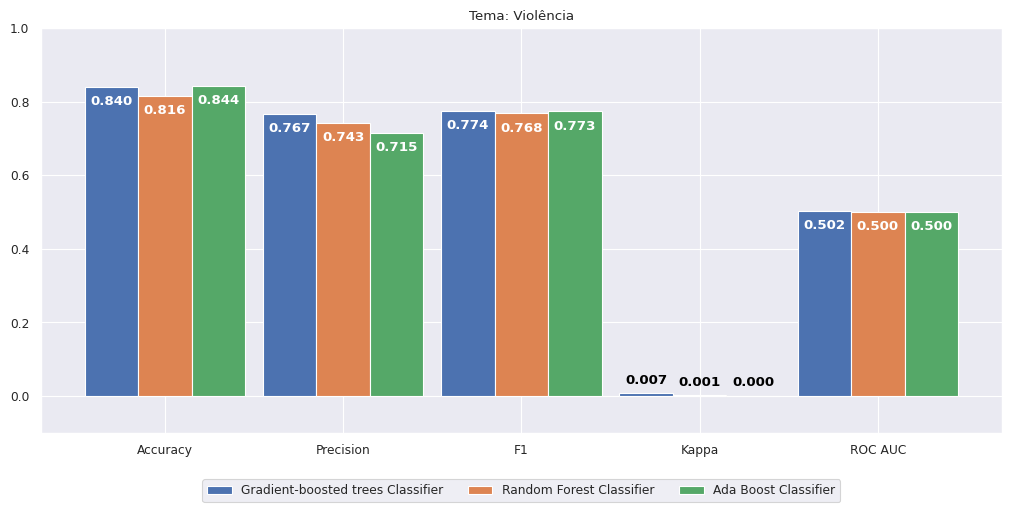

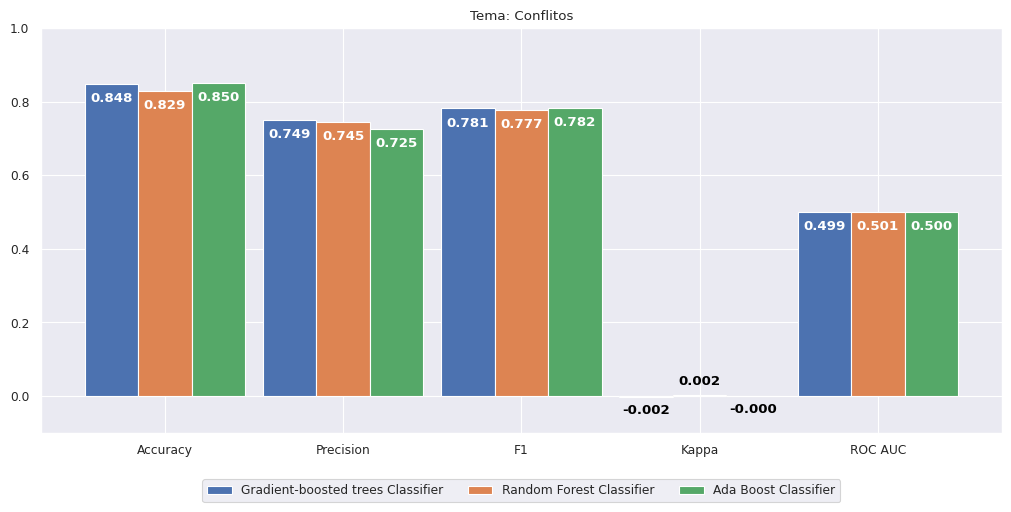

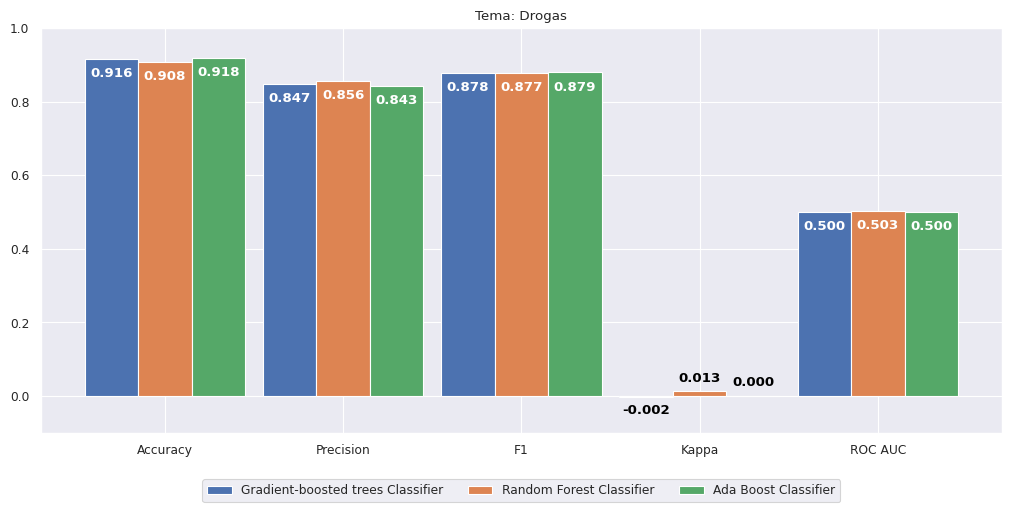

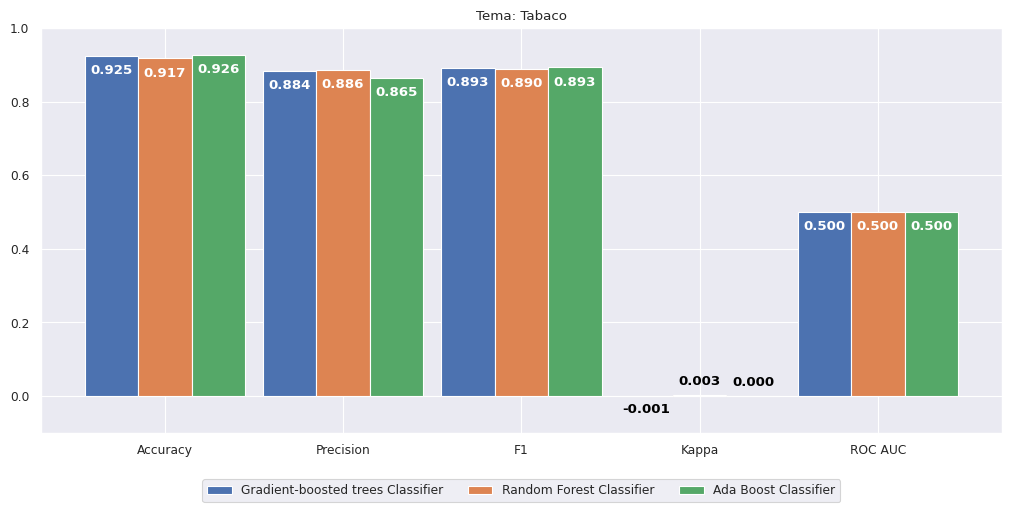

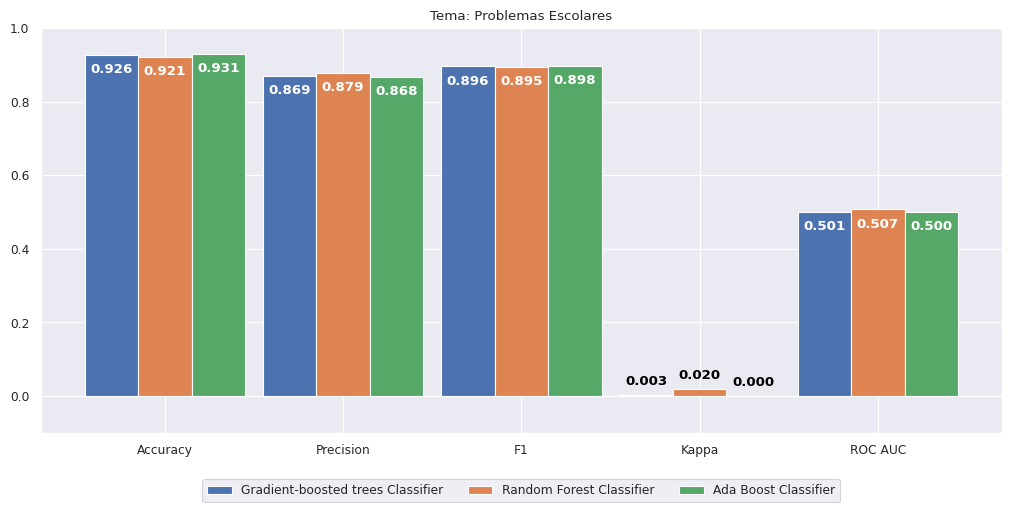

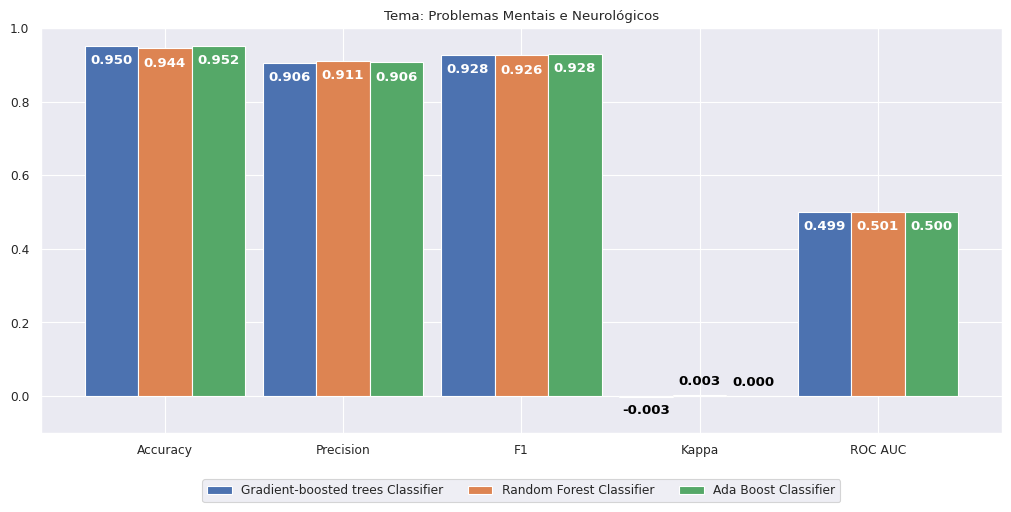

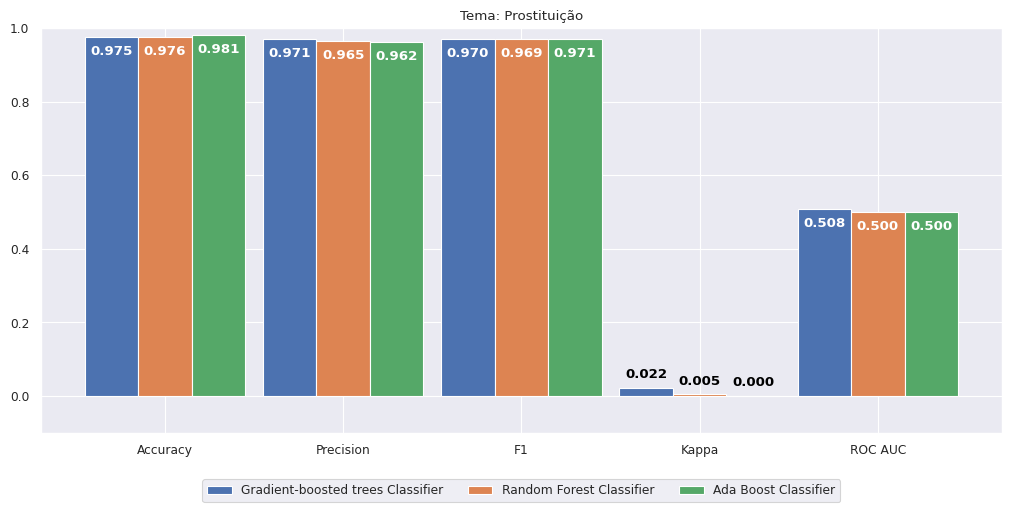

In [49]:
metricas = (gradient_boosting, random_forests, ada_boost)
for index in range(13):
  comparar_metricas(metricas, index)

### Gráficos comparativos por tema (resumo)

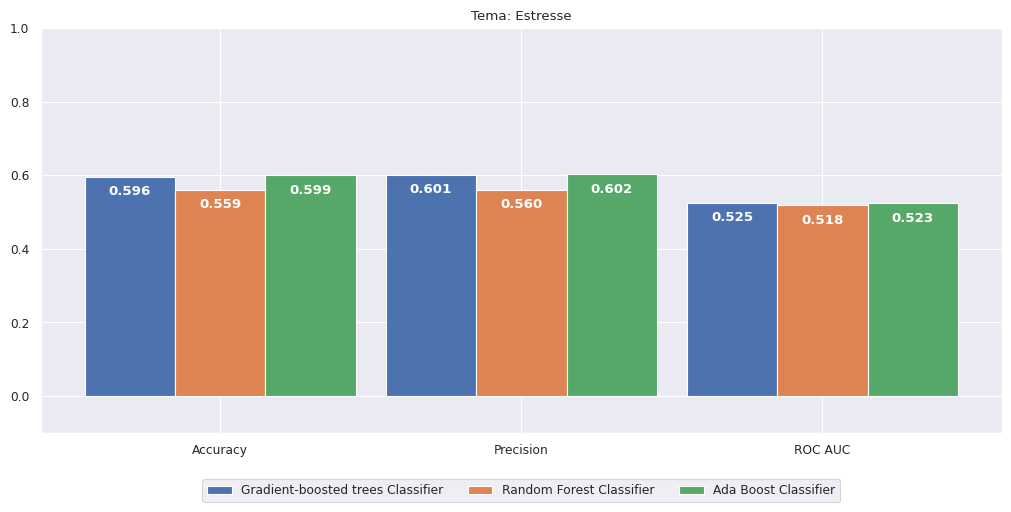

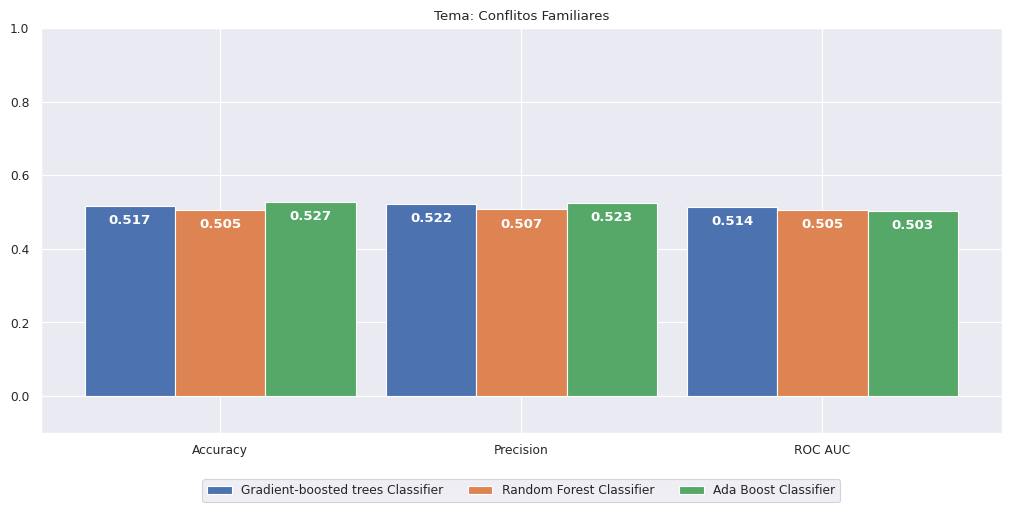

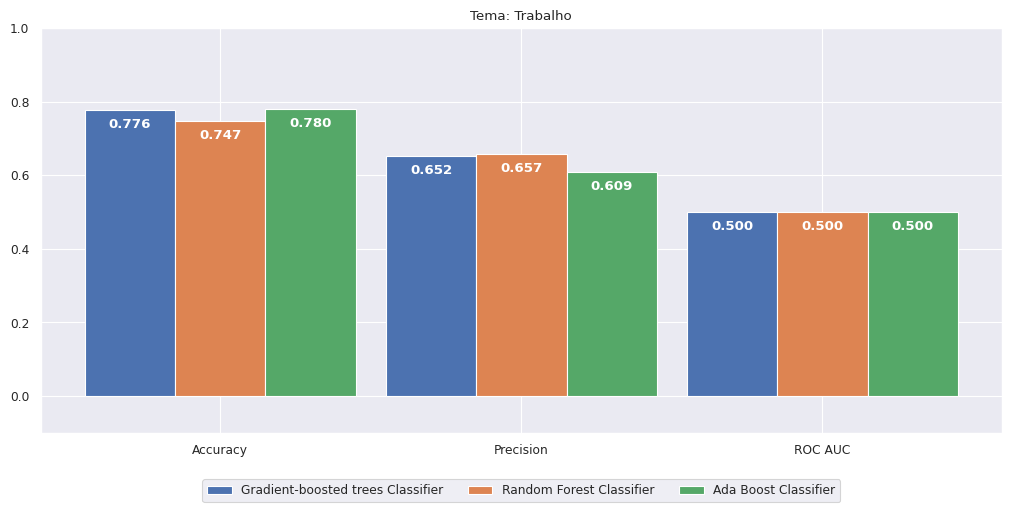

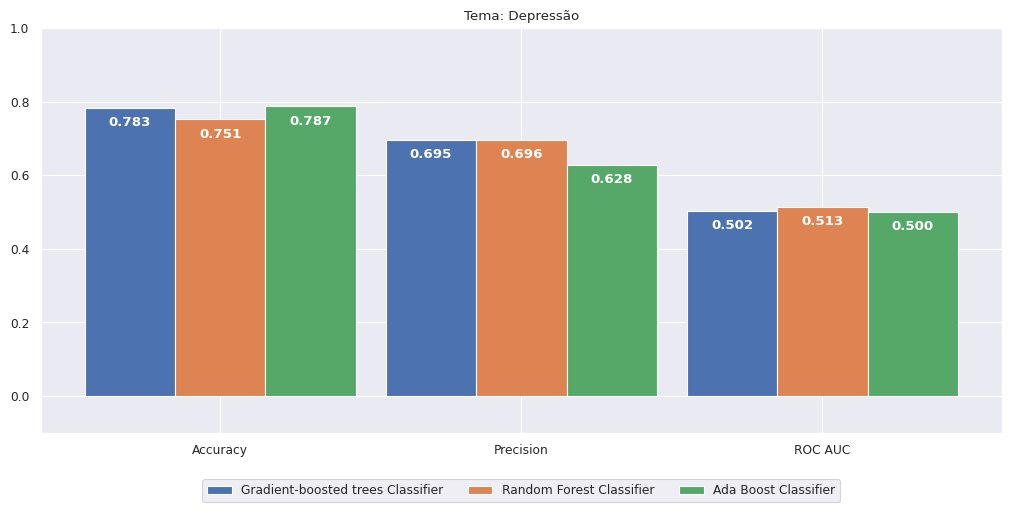

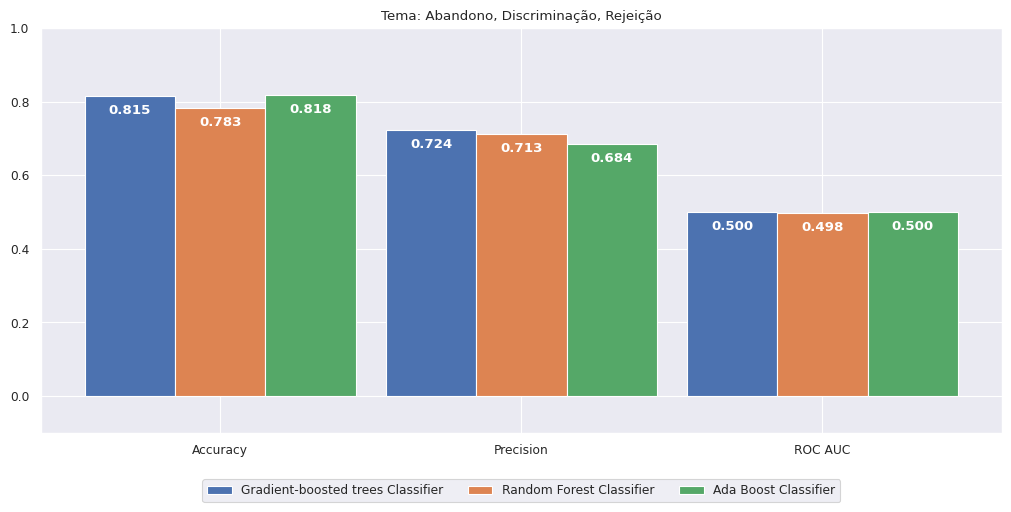

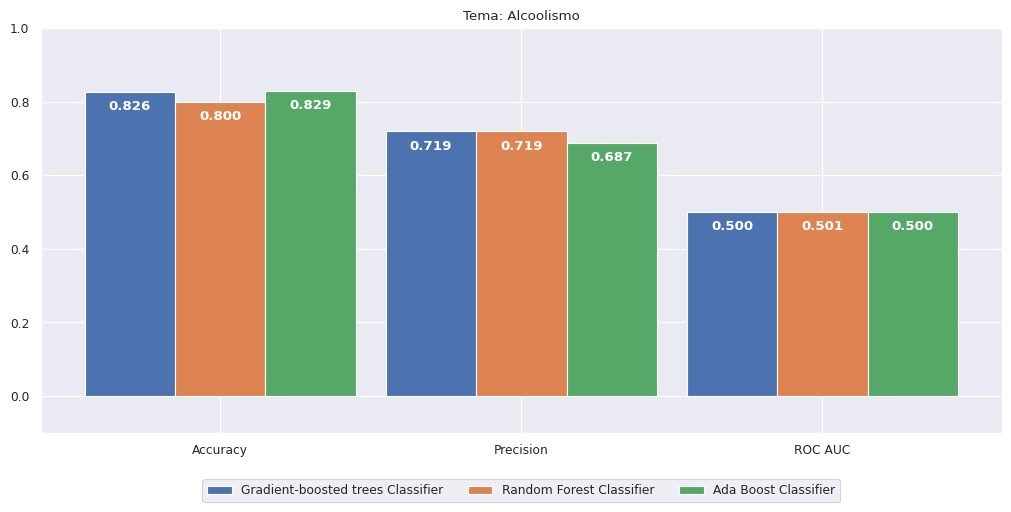

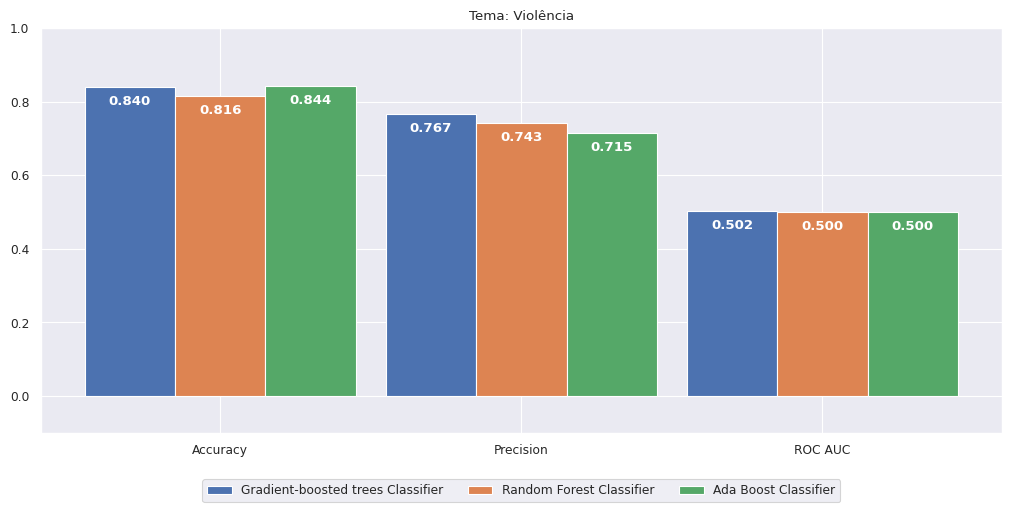

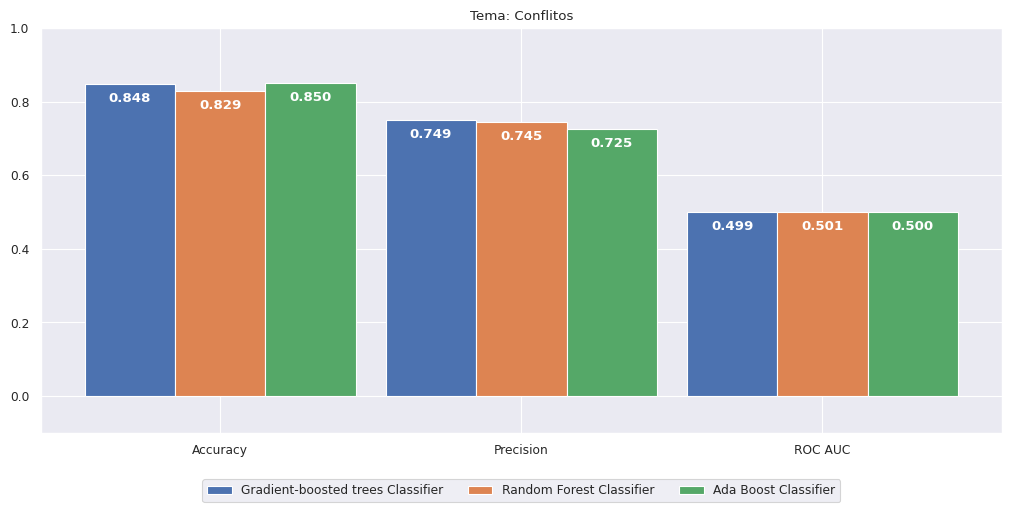

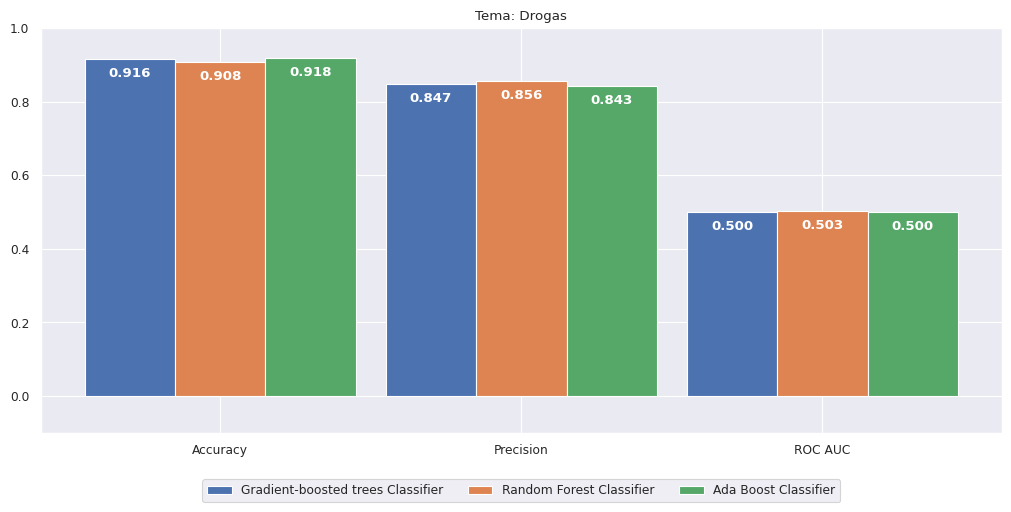

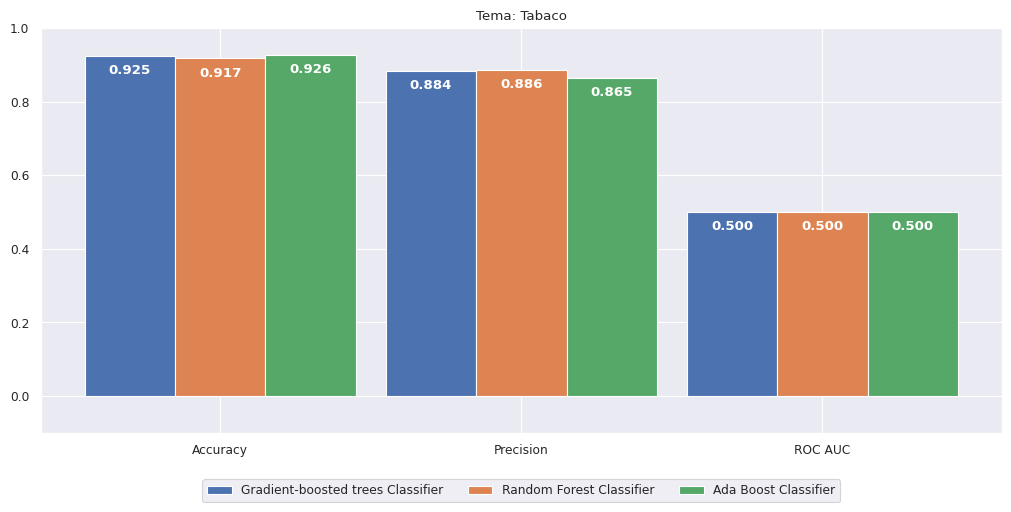

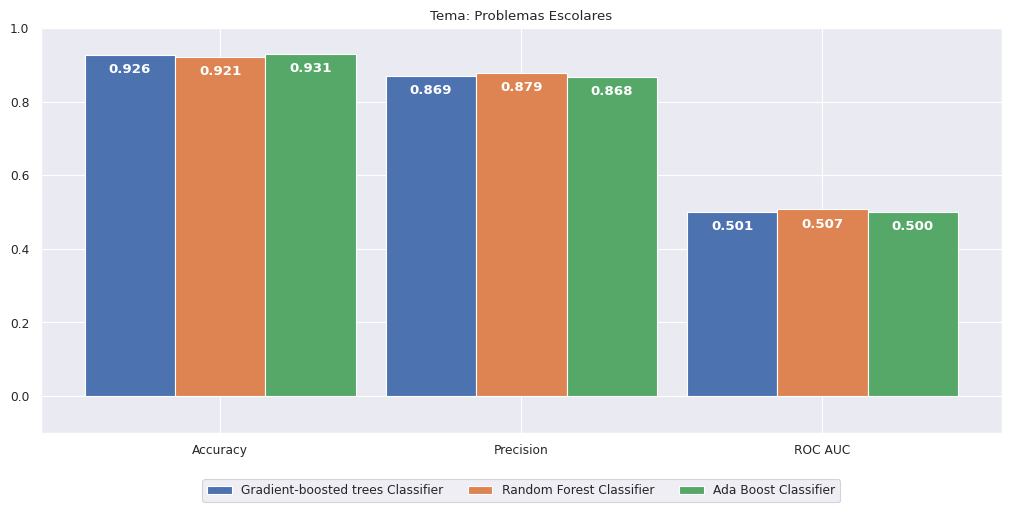

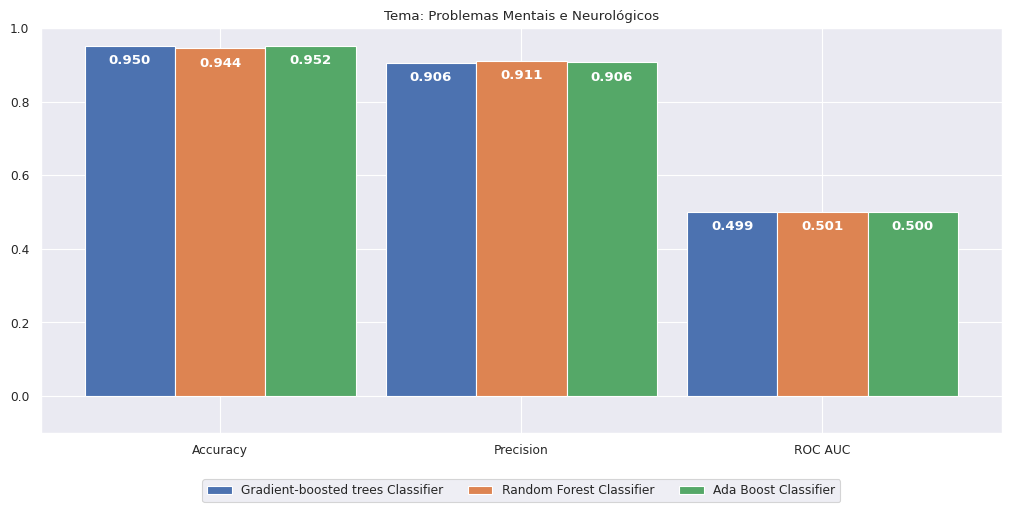

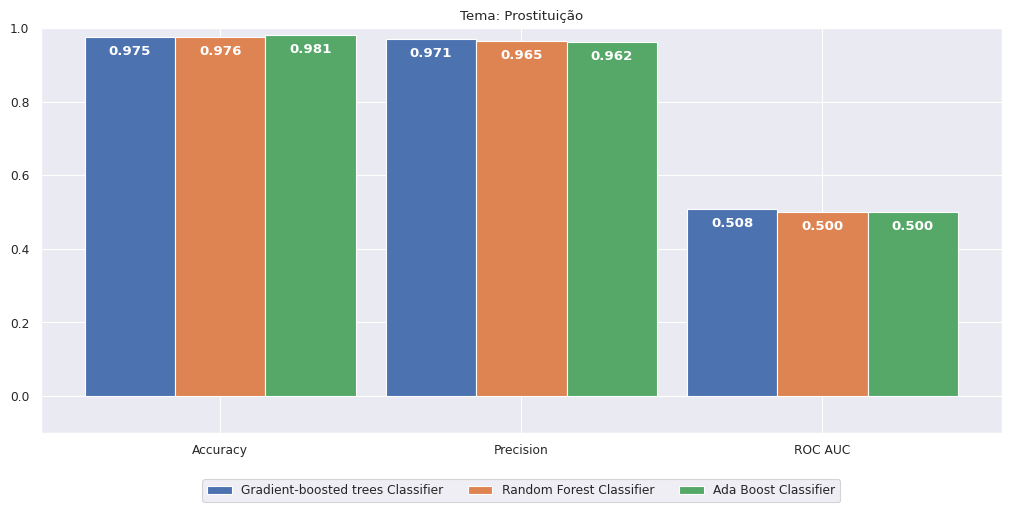

In [43]:
metricas = (gradient_boosting, random_forests, ada_boost)
for index in range(13):
  comparar_metricas(metricas, index, resumir=True)

## Modelo final

In [44]:
def calcular_pontuacao(metrica_scores):

  pontuacao_map = {}
  modelo_final = None

  for score in metrica_scores:
    modelo = score.modelo()
    modelo.resetar_pontuacao()
    pontuacao_map[modelo.nome] = modelo

  for i in range(13):
    max_accuracy = 0;
    max_precision = 0;
    max_roc = 0;

    for nome_modelo, modelo in pontuacao_map.items():
      if modelo.temas[i].accuracy > max_accuracy:
        max_accuracy = modelo.temas[i].accuracy

      if modelo.temas[i].precision > max_precision:
        max_precision = modelo.temas[i].precision

      if modelo.temas[i].roc > max_roc:
        max_roc = modelo.temas[i].roc

    for nome_modelo, modelo in pontuacao_map.items():
      if modelo.temas[i].accuracy == max_accuracy:
        modelo.pontuar()

      if modelo.temas[i].precision == max_precision:
        modelo.pontuar()

      if modelo.temas[i].roc == max_roc:
        modelo.pontuar()

  maior_pontuacao_geral = 0

  for nome_modelo, modelo in pontuacao_map.items():

    if modelo.pontuacao > maior_pontuacao_geral:
      maior_pontuacao_geral = modelo.pontuacao

    print(f"{nome_modelo}: {modelo.pontuacao} pontos")

  for nome_modelo, modelo in pontuacao_map.items():

    if modelo.pontuacao == maior_pontuacao_geral:
      modelo_final = modelo

  return modelo_final

In [45]:
metricas = (gradient_boosting, random_forests, ada_boost)

modelo_final = calcular_pontuacao(metricas)

print(f"\nModelo {modelo_final.nome} teve a maior pontuação ({modelo_final.pontuacao} pontos)")

Gradient-boosted trees Classifier: 10 pontos
Random Forest Classifier: 13 pontos
Ada Boost Classifier: 16 pontos

Modelo Ada Boost Classifier teve a maior pontuação (16 pontos)


In [46]:
from sklearn.model_selection import train_test_split
import copy

class ModeloTemaTerapia:

  def __init__(self, modelo_final, dados_final):
    self.modelo = modelo_final
    self.dados = dados_final
    self.publico = self.dados.loc[:, ["criancas", "adolescentes", "adultos", "idosos"]]
    self.temas = self.dados.loc[:, [
        "t_estresse", "t_conflitos_fam", "t_trabalho", "t_depressao", "t_aband_disc_rej", "t_alcoolismo",
        "t_violencia", "t_conflitos", "t_problemas_esc", "t_drogas", "t_tabaco", "t_problemas_men", "t_prostituicao"
    ]]

    self.temas_map = {
        'Estresse': 't_estresse',
        'Conflitos Familiares': 't_conflitos_fam',
        'Trabalho': 't_trabalho',
        'Depressão': 't_depressao',
        'Abandono, Discriminação, Rejeição': 't_aband_disc_rej',
        'Alcoolismo': 't_alcoolismo',
        'Violência': 't_violencia',
        'Conflitos': 't_conflitos',
        'Drogas': 't_drogas',
        'Tabaco': 't_tabaco',
        'Problemas Escolares': 't_problemas_esc',
        'Problemas Mentais e Neurológicos': 't_problemas_men',
        'Prostituição': 't_prostituicao'
    }

  def treinar(self):
    self.classificador_map = {}

    for tema_nome, tema_coluna in self.temas_map.items():
      X_train, X_test, y_train, y_test = train_test_split(self.publico, self.temas[tema_coluna], test_size=0.3, random_state=0)

      self.classificador_map[tema_coluna] = copy.deepcopy(self.modelo.classificador)
      self.classificador_map[tema_coluna].fit(self.publico, self.temas[tema_coluna])

  def prever(self, criancas, adolescentes, adultos, idosos):

    publico = [[criancas, adolescentes, adultos, idosos]]
    temas_provaveis = []

    for tema_nome, tema_coluna in self.temas_map.items():
      pode_ter_tema = self.classificador_map[tema_coluna].predict(publico)

      if (pode_ter_tema == 1):
        temas_provaveis.append(tema_nome)

    return temas_provaveis


In [47]:
modelo_temas_terapia = ModeloTemaTerapia(modelo_final, dados_final)

modelo_temas_terapia.treinar()

In [53]:
modelo_temas_terapia.prever(0, 30, 100, 50)

['Estresse',
 'Conflitos Familiares',
 'Abandono, Discriminação, Rejeição',
 'Alcoolismo']

# Fase 5: Avaliação